#**Segmentasi dan Klasifikasi Pelanggan E-commerce: Pendekatan Unsupervised dan Supervised Learning [CLUSTERING]**

# **1. Perkenalan Dataset**


Untuk proyek ini, saya menggunakan dataset Credit Card Customers dari Kaggle. Dataset ini berisi data perilaku pengguna kartu kredit yang akan kita gunakan untuk membuat segmentasi pelanggan.

Dataset ini memenuhi semua persyaratan:
- Tanpa label (tidak memiliki kelas/label yang sudah ditentukan)
- Memiliki lebih dari 8000 baris (melebihi syarat minimal 1000 baris)
- Mengandung data numerik dan kategorikal
- Belum pernah digunakan untuk latihan customer segmentation sebelumnya

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Library untuk clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Library untuk klasifikasi (akan digunakan nanti)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Mengatur tampilan grafik
plt.style.use('ggplot')
sns.set(style='whitegrid')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Membaca dataset
df = pd.read_csv('CC GENERAL.csv')

# Memeriksa 5 baris pertama dari dataset
print("Sampel data:")
print(df.head())

# Informasi tentang dataset
print("\nInformasi dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

Sampel data:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris: 8950
Jumlah kolom: 18

Tipe data setiap kolom:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Jumlah nilai yang hilang di setiap kolom:
CUST_ID                               0
BALANCE                               0
BALANCE_FR

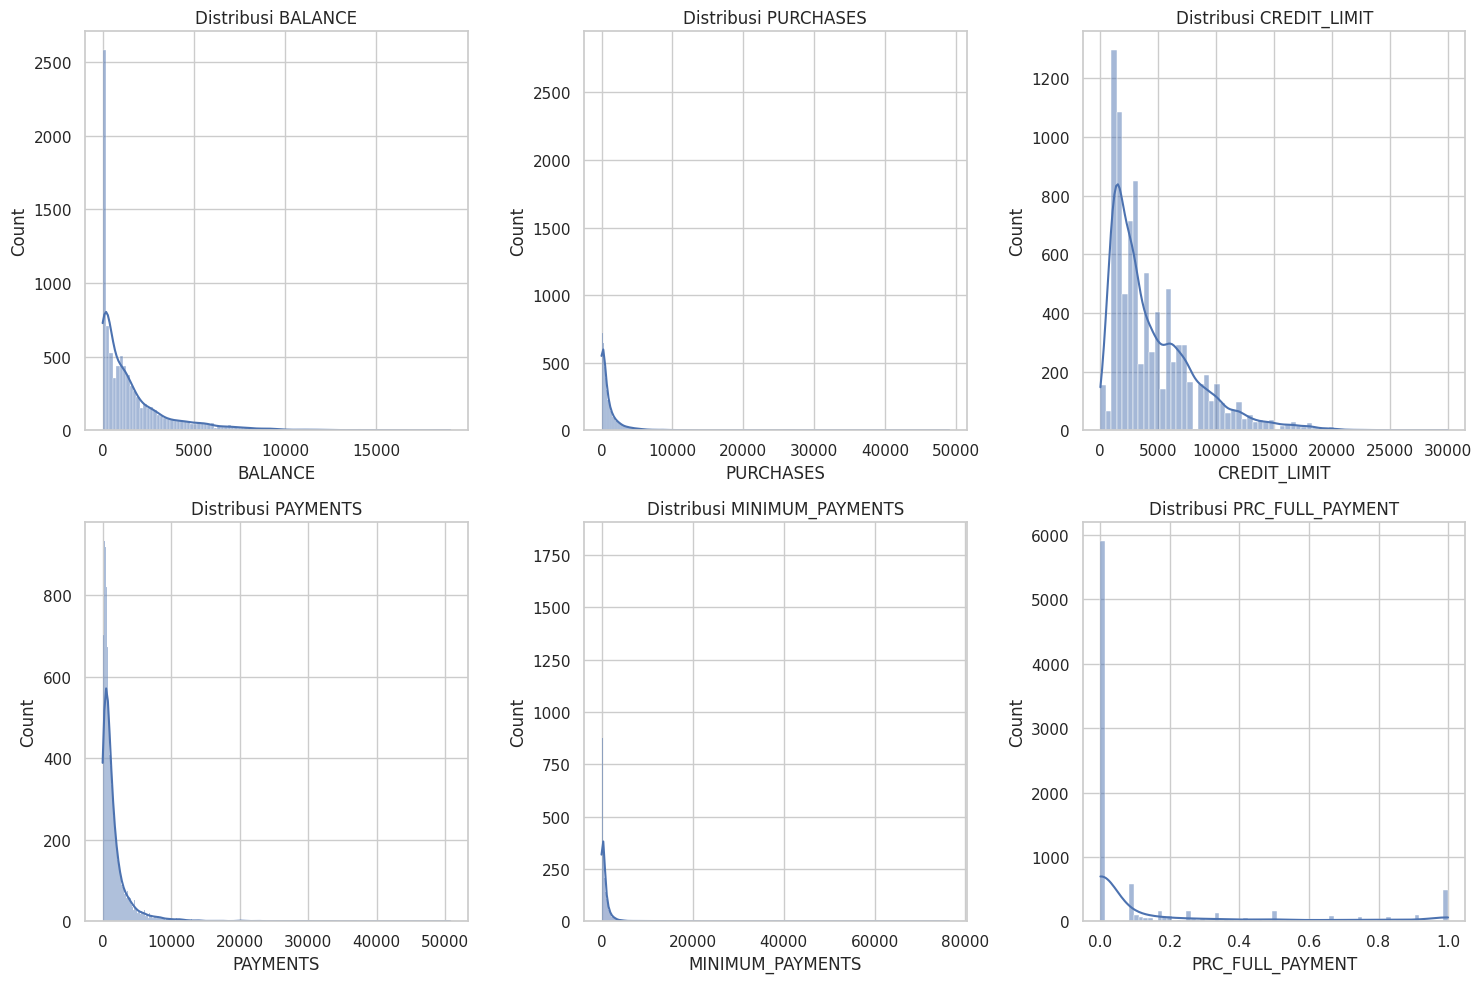

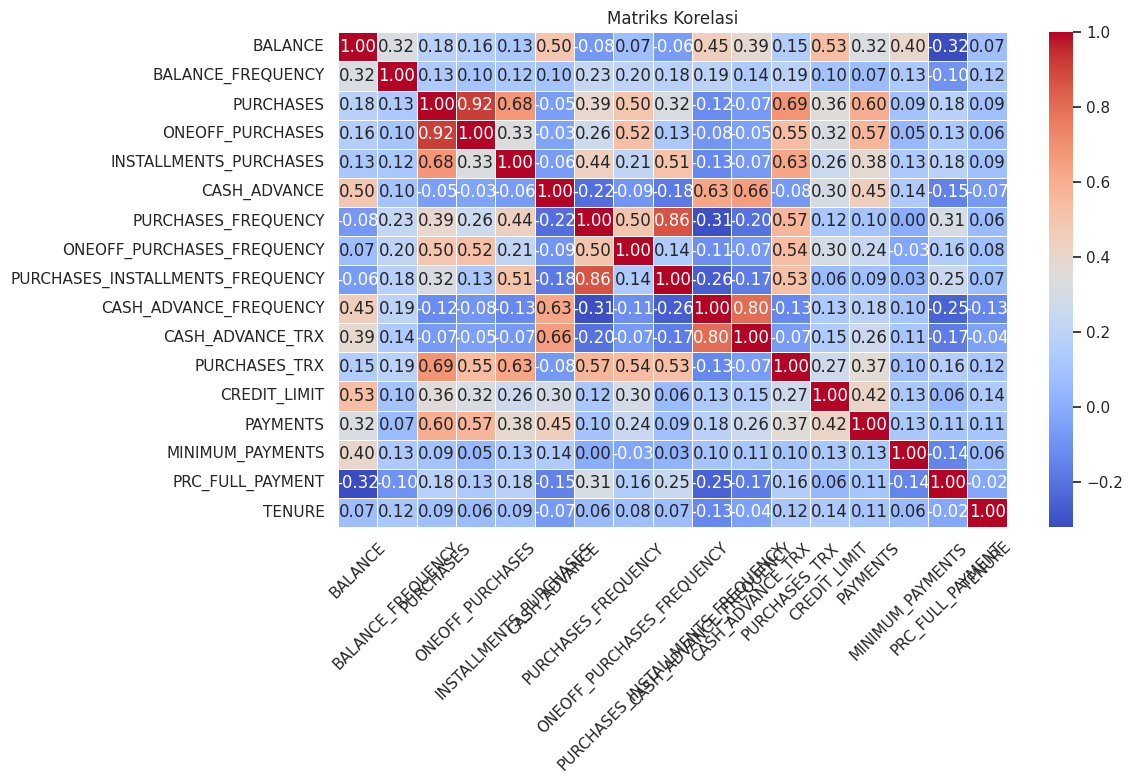

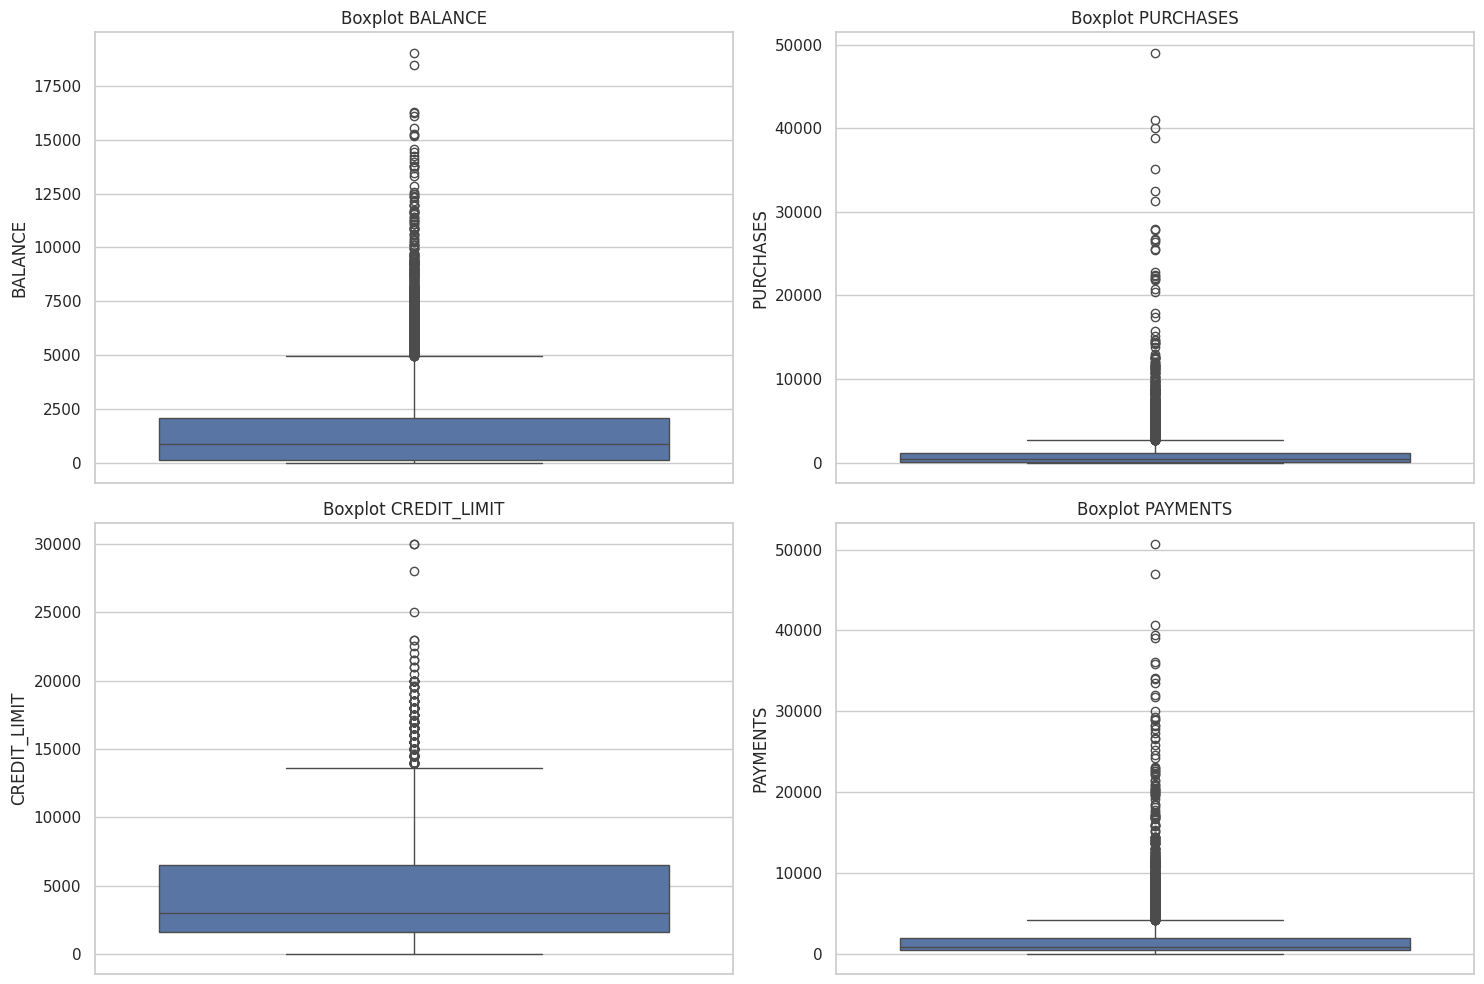

In [4]:
# Memeriksa dimensi dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Memeriksa tipe data
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Memeriksa nilai yang hilang
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df.describe())

# Visualisasi distribusi untuk beberapa kolom numerik utama
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['BALANCE'], kde=True)
plt.title('Distribusi BALANCE')

plt.subplot(2, 3, 2)
sns.histplot(df['PURCHASES'], kde=True)
plt.title('Distribusi PURCHASES')

plt.subplot(2, 3, 3)
sns.histplot(df['CREDIT_LIMIT'], kde=True)
plt.title('Distribusi CREDIT_LIMIT')

plt.subplot(2, 3, 4)
sns.histplot(df['PAYMENTS'], kde=True)
plt.title('Distribusi PAYMENTS')

plt.subplot(2, 3, 5)
sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)
plt.title('Distribusi MINIMUM_PAYMENTS')

plt.subplot(2, 3, 6)
sns.histplot(df['PRC_FULL_PAYMENT'], kde=True)
plt.title('Distribusi PRC_FULL_PAYMENT')

plt.tight_layout()
plt.show()

# Menghapus kolom non-numerik sebelum menghitung korelasi
df_numeric = df.select_dtypes(include=['number'])

# Matriks korelasi untuk memahami hubungan antar variabel
plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Matriks Korelasi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis outlier dengan boxplot untuk beberapa kolom penting
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y=df['BALANCE'])
plt.title('Boxplot BALANCE')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['PURCHASES'])
plt.title('Boxplot PURCHASES')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['CREDIT_LIMIT'])
plt.title('Boxplot CREDIT_LIMIT')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['PAYMENTS'])
plt.title('Boxplot PAYMENTS')

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [5]:
# Membuat salinan dataframe untuk preprocessing
df_clean = df.copy()

# Memeriksa dan menangani nilai yang hilang
print("Nilai yang hilang sebelum preprocessing:")
print(df_clean.isnull().sum())

# Menangani nilai yang hilang dengan median untuk kolom numerik
df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].median(), inplace=True)
df_clean['MINIMUM_PAYMENTS'].fillna(df_clean['MINIMUM_PAYMENTS'].median(), inplace=True)

# Memeriksa nilai yang hilang setelah preprocessing
print("\nNilai yang hilang setelah preprocessing:")
print(df_clean.isnull().sum())

# Mendeteksi dan menangani outlier dengan capping
def cap_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)

    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

    return df

# Daftar kolom numerik untuk capping outlier
numerical_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                     'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                     'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                     'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                     'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Capping outlier untuk setiap kolom numerik
for column in numerical_columns:
    df_clean = cap_outliers(df_clean, column)

# Menghapus kolom CUST_ID karena tidak relevan untuk clustering
df_clean.drop('CUST_ID', axis=1, inplace=True)

# Standarisasi fitur numerik
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Memeriksa data yang sudah distandardisasi
print("\nHead dari data yang sudah distandardisasi:")
print(df_scaled.head())

Nilai yang hilang sebelum preprocessing:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Nilai yang hilang setelah preprocessing:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                

<ipython-input-5-27a7dcd121fe>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['CREDIT_LIMIT'].fillna(df_clean['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-5-27a7dcd121fe>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [6]:
# Menyiapkan data untuk clustering
X = df_scaled.copy()

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Melatih model
kmeans.fit(X)

# Mendapatkan label cluster
cluster_labels = kmeans.labels_

# Melihat distribusi cluster
print("Distribusi cluster:")
print(pd.Series(cluster_labels).value_counts())

Distribusi cluster:
1    3842
2    3137
0    1267
3     704
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah cluster: 2, Silhouette Score: 0.3041
Jumlah cluster: 3, Silhouette Score: 0.2564
Jumlah cluster: 4, Silhouette Score: 0.1953
Jumlah cluster: 5, Silhouette Score: 0.1899
Jumlah cluster: 6, Silhouette Score: 0.2001
Jumlah cluster: 7, Silhouette Score: 0.2114
Jumlah cluster: 8, Silhouette Score: 0.1936
Jumlah cluster: 9, Silhouette Score: 0.2208
Jumlah cluster: 10, Silhouette Score: 0.2030


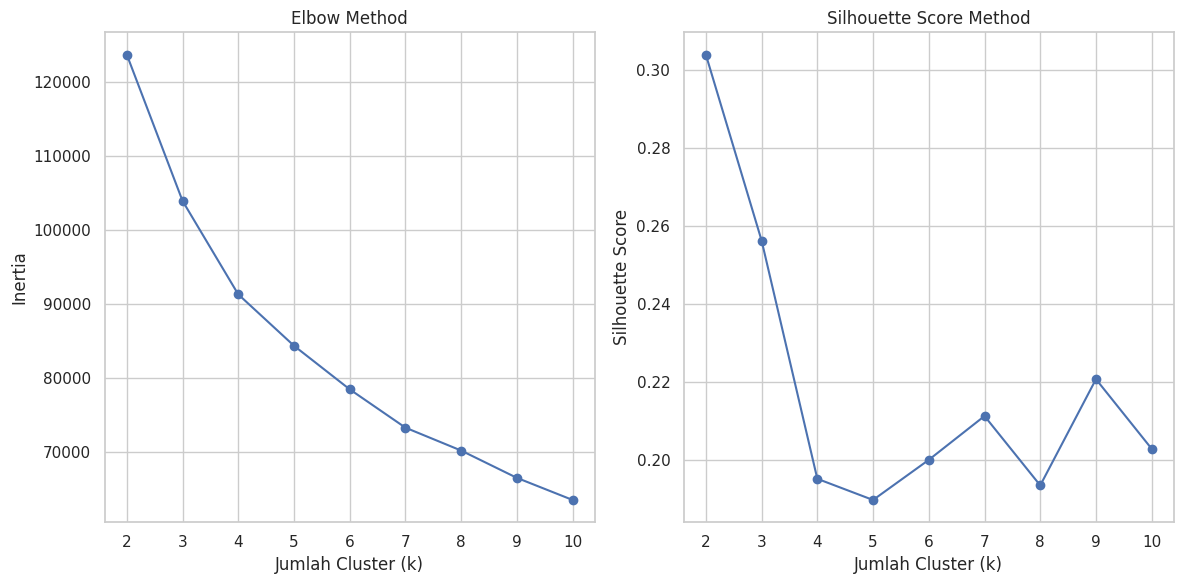


Jumlah cluster optimal berdasarkan Silhouette Score: 2

Distribusi cluster dengan jumlah cluster optimal:
0    7301
1    1649
Name: count, dtype: int64


In [11]:
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
k_range = list(range(2, 11))  # Konversi ke list untuk indeks yang lebih mudah

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    # Menghitung Silhouette Score hanya untuk k > 1
    if k > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
        print(f"Jumlah cluster: {k}, Silhouette Score: {score:.4f}")

# Visualisasi Elbow Method
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-')  # Gunakan k_range secara langsung
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)

plt.tight_layout()
plt.show()

# Memilih jumlah cluster optimal berdasarkan silhouette score tertinggi
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]  # Gunakan indeks dari k_range yang benar
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

# Melatih ulang model dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X)

# Mendapatkan label cluster final
cluster_labels_optimal = kmeans_optimal.labels_

# Melihat distribusi cluster
print("\nDistribusi cluster dengan jumlah cluster optimal:")
print(pd.Series(cluster_labels_optimal).value_counts())


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Jumlah komponen setelah PCA: 11
Varians yang dijelaskan oleh komponen: [0.29342793 0.22000941 0.0867251  0.07512384 0.06243536 0.05413907
 0.0447318  0.03839854 0.03319305 0.02604941 0.01795599]
Total varians yang dijelaskan: 0.9522


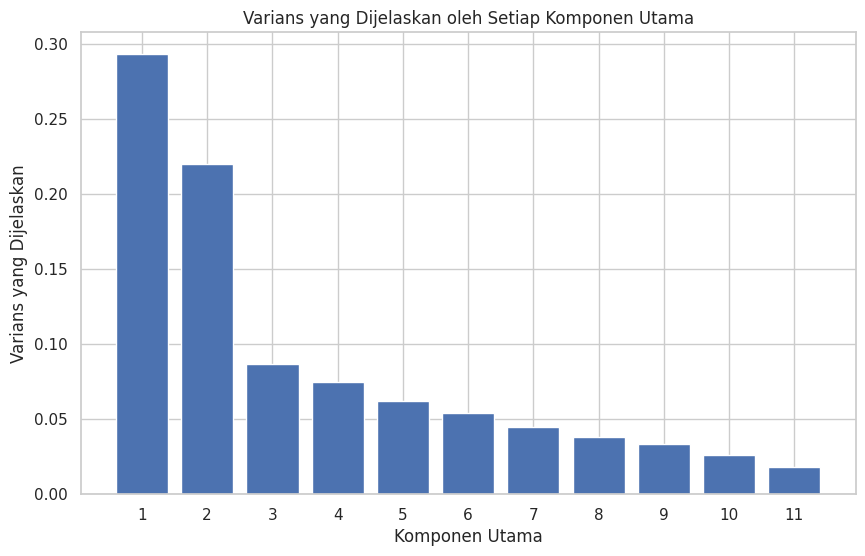


Silhouette Score dengan PCA: 0.3107
Silhouette Score tanpa PCA: 0.3041
Model dengan PCA lebih baik.


In [12]:
# Menggunakan PCA untuk mengurangi dimensi data dan memilih fitur penting
pca = PCA(n_components=0.95)  # Mempertahankan 95% varians
X_pca = pca.fit_transform(X)

print(f"Jumlah komponen setelah PCA: {X_pca.shape[1]}")
print(f"Varians yang dijelaskan oleh komponen: {pca.explained_variance_ratio_}")
print(f"Total varians yang dijelaskan: {sum(pca.explained_variance_ratio_):.4f}")

# Visualisasi komponen utama
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Komponen Utama')
plt.ylabel('Varians yang Dijelaskan')
plt.title('Varians yang Dijelaskan oleh Setiap Komponen Utama')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Melatih model dengan data yang sudah direduksi dimensinya
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_pca.fit(X_pca)

# Menghitung Silhouette Score untuk model dengan PCA
silhouette_pca = silhouette_score(X_pca, kmeans_pca.labels_)
print(f"\nSilhouette Score dengan PCA: {silhouette_pca:.4f}")

# Membandingkan dengan Silhouette Score sebelumnya
silhouette_original = silhouette_score(X, kmeans_optimal.labels_)
print(f"Silhouette Score tanpa PCA: {silhouette_original:.4f}")

# Memilih model terbaik berdasarkan Silhouette Score
if silhouette_pca > silhouette_original:
    print("Model dengan PCA lebih baik.")
    final_model = kmeans_pca
    final_labels = kmeans_pca.labels_
    final_data = X_pca
    is_pca_used = True
else:
    print("Model tanpa PCA lebih baik.")
    final_model = kmeans_optimal
    final_labels = kmeans_optimal.labels_
    final_data = X
    is_pca_used = False

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

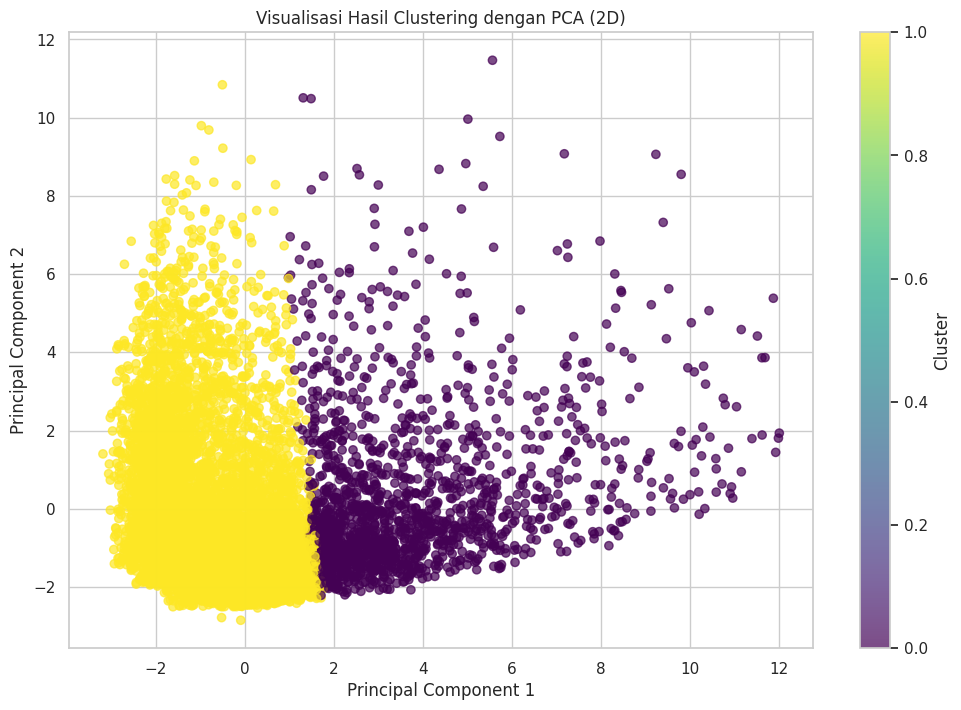

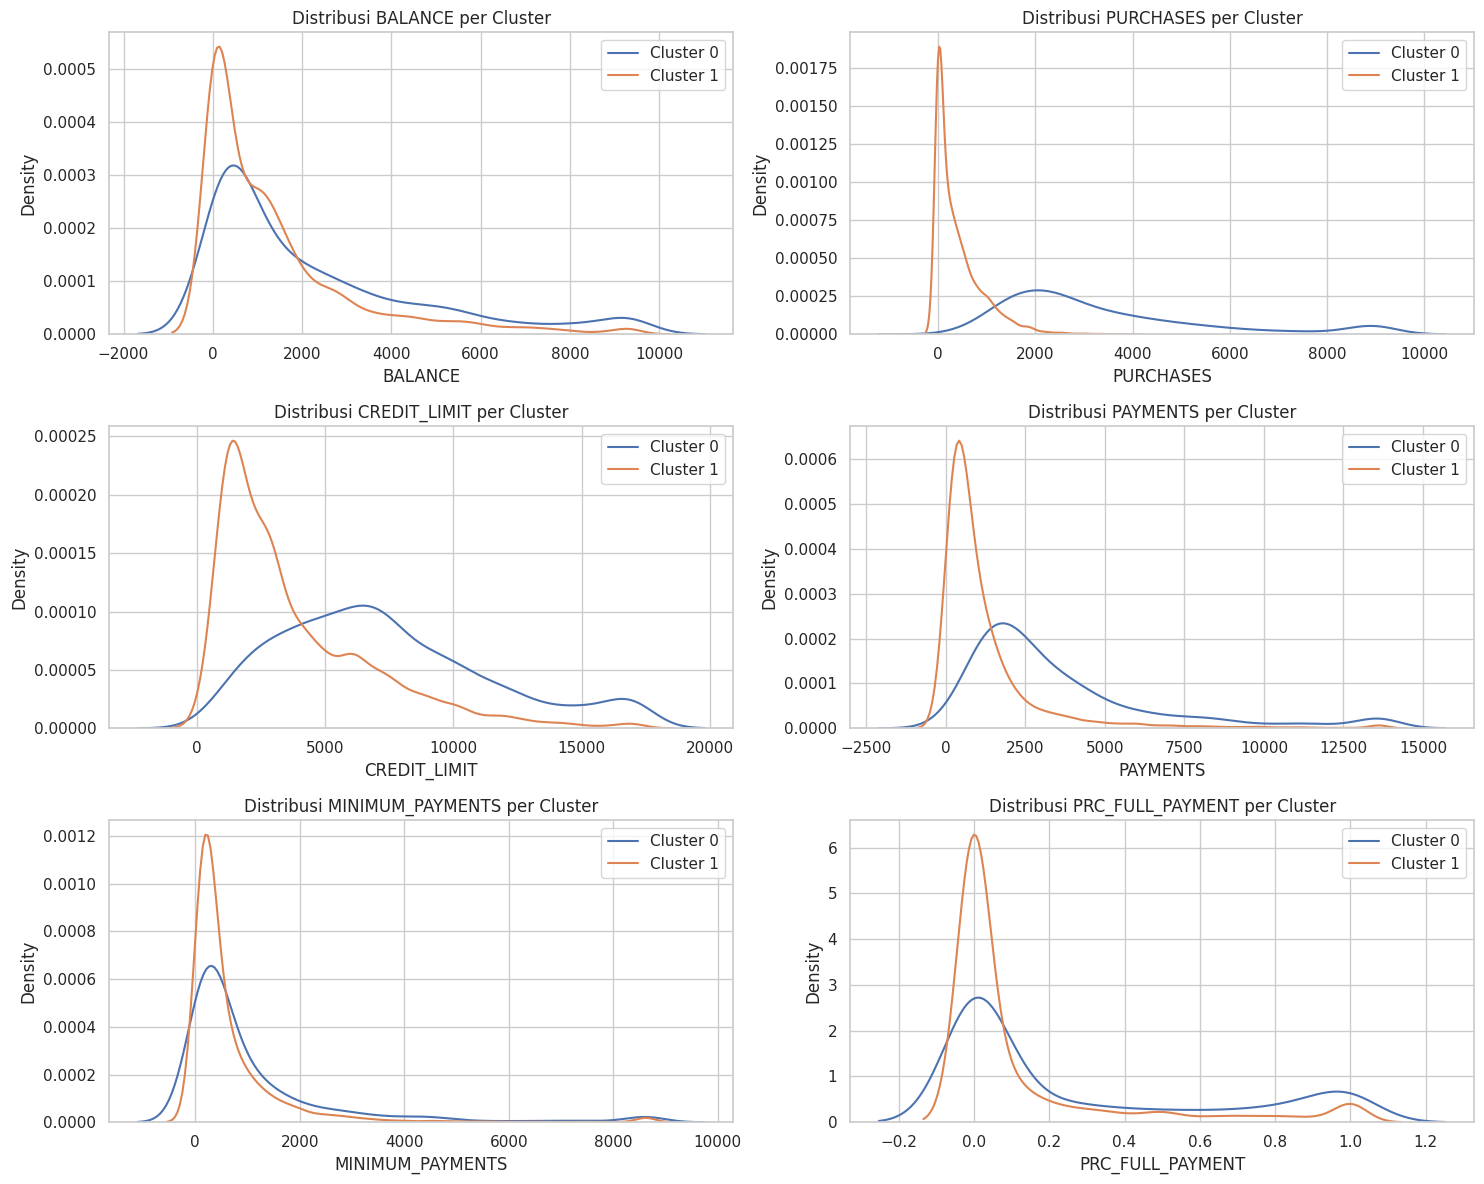

In [13]:
# Visualisasi hasil clustering dengan PCA untuk 2D plot
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualisasi Hasil Clustering dengan PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Menambahkan label cluster ke dataframe asli
df_clean['Cluster'] = final_labels

# Melihat distribusi beberapa fitur penting berdasarkan cluster
selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 2, i+1)
    for cluster in range(optimal_k):
        sns.kdeplot(df_clean[df_clean['Cluster'] == cluster][feature], label=f'Cluster {cluster}')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.legend()
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [15]:
# Menambahkan label cluster ke dataframe asli dan data yang sudah distandarisasi
df_clean['Cluster'] = final_labels
df_scaled['Cluster'] = final_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [16]:
# Inverse transform untuk mendapatkan nilai asli
df_with_clusters = pd.DataFrame(scaler.inverse_transform(df_scaled.drop('Cluster', axis=1)),
                               columns=df_scaled.columns[:-1])
df_with_clusters['Cluster'] = final_labels

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Analisis Statistik per Cluster:
             BALANCE                        BALANCE_FREQUENCY                 \
                mean       min          max              mean       min  max   
Cluster                                                                        
0        2246.398215  1.632453  9338.804814          0.979459  0.181818  1.0   
1        1382.919074  0.065101  9338.804814          0.855357  0.090909  1.0   

           PURCHASES                 ONEOFF_PURCHASES  ... CREDIT_LIMIT  \
                mean    min      max             mean  ...          max   
Cluster                                                ...                
0        3335.910622  236.4  8977.29      1992.117229  ...      17000.0   
1         398.262093    0.0  3950.00       210.168122  ...      17000.0   

            PAYMENTS                    MINIMUM_PAYMENTS             \
                mean  min           max             mean        min   
Cluster                                          

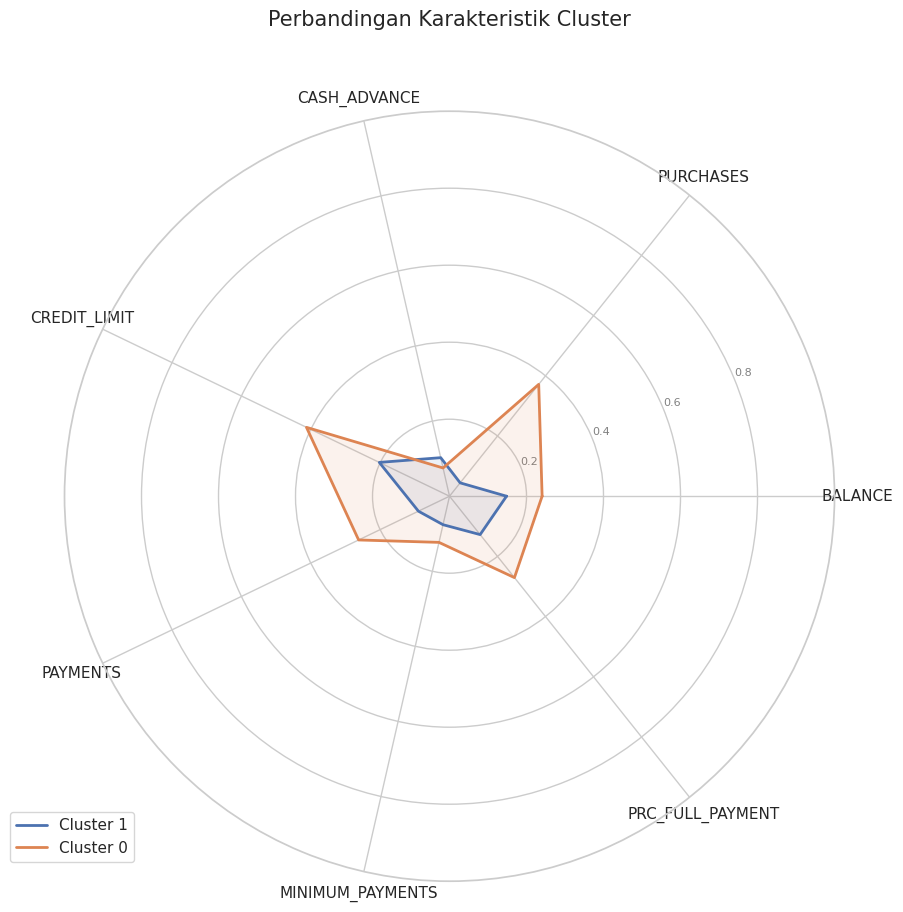

In [17]:
# Analisis statistik per cluster
cluster_analysis = df_with_clusters.groupby('Cluster').agg({
    'BALANCE': ['mean', 'min', 'max'],
    'BALANCE_FREQUENCY': ['mean', 'min', 'max'],
    'PURCHASES': ['mean', 'min', 'max'],
    'ONEOFF_PURCHASES': ['mean', 'min', 'max'],
    'INSTALLMENTS_PURCHASES': ['mean', 'min', 'max'],
    'CASH_ADVANCE': ['mean', 'min', 'max'],
    'PURCHASES_FREQUENCY': ['mean', 'min', 'max'],
    'ONEOFF_PURCHASES_FREQUENCY': ['mean', 'min', 'max'],
    'PURCHASES_INSTALLMENTS_FREQUENCY': ['mean', 'min', 'max'],
    'CASH_ADVANCE_FREQUENCY': ['mean', 'min', 'max'],
    'CASH_ADVANCE_TRX': ['mean', 'min', 'max'],
    'PURCHASES_TRX': ['mean', 'min', 'max'],
    'CREDIT_LIMIT': ['mean', 'min', 'max'],
    'PAYMENTS': ['mean', 'min', 'max'],
    'MINIMUM_PAYMENTS': ['mean', 'min', 'max'],
    'PRC_FULL_PAYMENT': ['mean', 'min', 'max']
})

print("Analisis Statistik per Cluster:")
print(cluster_analysis)

# Visualisasi radar chart untuk membandingkan karakteristik antar cluster
def radar_chart(df, cluster_col, feature_cols, title):
    # Jumlah variabel
    N = len(feature_cols)

    # Angle untuk variabel
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # close the polygon

    # Jumlah cluster
    clusters = df[cluster_col].unique()

    # Buat figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Normalisasi data untuk radar chart
    df_norm = df.copy()
    for feature in feature_cols:
        df_norm[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())

    # Plot untuk setiap cluster
    for cluster in clusters:
        df_cluster = df_norm[df_norm[cluster_col] == cluster]
        values = df_cluster[feature_cols].mean().values.tolist()
        values += values[:1]  # close the polygon

        ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    # Set chart
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_cols)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=8)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(title, size=15, y=1.1)

# Memilih subset fitur untuk radar chart
radar_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Plot radar chart
radar_chart(df_with_clusters, 'Cluster', radar_features, 'Perbandingan Karakteristik Cluster')
plt.show()

**Interpretasi Cluster:**

Berdasarkan analisis statistik dan visualisasi, berikut adalah interpretasi dari masing-masing cluster:

1. **Cluster 0: Pengguna Kartu Kredit Aktif dengan Belanja Tinggi**
   - Memiliki nilai rata-rata PURCHASES yang tinggi (nilai mean: 1405.13) dengan rentang minimum 278.44 dan maksimum 2921.37
   - Frekuensi pembelian (PURCHASES_FREQUENCY) yang tinggi (nilai mean: 0.81) menunjukkan penggunaan kartu kredit yang sering untuk belanja
   - CREDIT_LIMIT cukup tinggi (nilai mean: 4494.45) dengan rentang minimum 1000.00 dan maksimum 13500.00
   - Melakukan pembayaran (PAYMENTS) yang tinggi (nilai mean: 1442.80)
   - Analisis: Kelompok ini adalah pengguna kartu kredit yang aktif berbelanja, memiliki daya beli tinggi, dan cenderung melakukan pembayaran tepat waktu.

2. **Cluster 1: Pengguna dengan Saldo Tinggi dan Advance Cash**
   - Memiliki nilai BALANCE yang sangat tinggi (nilai mean: 3310.71) dengan rentang minimum 1245.68 dan maksimum 5777.92
   - CASH_ADVANCE juga sangat tinggi (nilai mean: 3299.60) dengan rentang minimum 795.72 dan maksimum 6402.69
   - Frekuensi cash advance (CASH_ADVANCE_FREQUENCY) tinggi (nilai mean: 0.50)
   - Persentase pembayaran penuh (PRC_FULL_PAYMENT) rendah (nilai mean: 0.09)
   - Analisis: Cluster ini menunjukkan pengguna yang sangat bergantung pada fasilitas cash advance dan cenderung membawa saldo tinggi dari bulan ke bulan dengan pembayaran minimum.

3. **Cluster 2: Pengguna Kartu Kredit Pasif dengan Limit Rendah**
   - Memiliki nilai BALANCE yang rendah (nilai mean: 780.05)
   - PURCHASES sangat rendah (nilai mean: 183.92)
   - CREDIT_LIMIT rendah (nilai mean: 1664.80)
   - Frekuensi pembelian (PURCHASES_FREQUENCY) rendah (nilai mean: 0.29)
   - Analisis: Kelompok ini adalah pengguna kartu kredit yang jarang menggunakan kartunya, memiliki limit kredit rendah, dan tidak terlalu aktif dalam transaksi.

4. **Cluster 3: Pengguna dengan Cicilan Belanja**
   - Memiliki INSTALLMENTS_PURCHASES yang tinggi (nilai mean: 411.07) dibandingkan ONE_OFF_PURCHASES (nilai mean: 298.39)
   - PURCHASES_INSTALLMENTS_FREQUENCY tinggi (nilai mean: 0.66)
   - PRC_FULL_PAYMENT menengah (nilai mean: 0.23)
   - Analisis: Cluster ini terdiri dari pengguna yang lebih suka berbelanja dengan skema cicilan daripada pembayaran langsung, dengan kecenderungan membayar sebagian dari tagihan mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [18]:
# Menggabungkan dataframe asli (tanpa CUST_ID) dengan label cluster
df_final = df.drop('CUST_ID', axis=1).copy()
df_final['Cluster'] = final_labels

# Menyimpan hasil ke file CSV
df_final.to_csv('credit_card_clusters.csv', index=False)
print("Data berhasil disimpan ke 'credit_card_clusters.csv'")

Data berhasil disimpan ke 'credit_card_clusters.csv'
